# **1. KNN Regression**
### Diamond Price Prediction

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import KFold
import pydotplus
from sklearn import tree
from sklearn.metrics import r2_score
import seaborn as sns
import pickle as pkl
import math
import matplotlib.pyplot as plt
import time
import platform
import random
import os

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#---------------------------------------- UTILITIES ----------------------------------------#

def save_to_pickle(arr, filename):
    with open(filename,'wb') as f:
        pkl.dump(arr, f)
     
def load_from_pickle(filename):
    arr = []
    with open(filename,'rb') as f:
        arr = pkl.load(f)
    return arr

In [ ]:
df = pd.read_csv("/content/diamonds.csv")

K = [2,3,5,7,11,16]

#### Label Encoding
As all categorical coloumns have ordinal relationships, Label Encoding is preferable over One Hot Encoding

In [ ]:
labelencoder = LabelEncoder()
def label_encoding(df, cols):
    for c in cols:
        col = df[c]
        df = df.drop(c, 1)
        df[c] = labelencoder.fit_transform(col)
    return df

cols = ['cut', 'color', 'clarity']
df = label_encoding(df, cols)
print("DATA AFTER LABEL ENCODING : \n")
df.head()

DATA AFTER LABEL ENCODING : 



,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3


#### Data Formatting

In [ ]:
price = df['price']
df = df.drop('price', 1)
df['price'] = price

#### Normalization

Used Min-Max method for Normalization

In [ ]:
def normalize(df, cols):
    for c in cols:
        df[c] = (df[c] - df[c].min())/(df[c].max() - df[c].min())
    return df

norm_cols = ["carat","cut","color","clarity","depth","table","x","y","z"]
data_without_normalization = df
df = normalize(df, norm_cols)

#### Splitting Dataset

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

x2 = data_without_normalization.iloc[:, :-1]
y2 = data_without_normalization.iloc[:, :-1]

#------------------------------------- NORMALIZED DATA -------------------------------------#
which
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=55)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy().reshape(-1,1)
x_test = x_test.to_numpy()
y_test = y_test.to_numpy().reshape(-1,1)

#--------------------------------------- ACTUAL DATA ---------------------------------------#

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.02, random_state=55)
x2_train = x2_train.to_numpy()
x2_test = x2_test.to_numpy()

print("Training data size : ", x_train.shape[0])
print("Testing data size : ", x_test.shape[0])

tactual = []
for i in range(0, len(y_test)):
    tactual.append(y_test[i][0])
actual = np.array(tactual)

Training data size :  52861
Testing data size :  1079


## **Q1. (a)**
#### Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

#### KNN Algorithm for Regression

In [ ]:
def euclidean_distance(datapoint1, datapoint2, no_of_features):
    res = 0
    for i in range(0, no_of_features):
        res+= (datapoint1[i] - datapoint2[i])**2
    return math.sqrt(res)


def manhattan_distance(datapoint1, datapoint2, no_of_features):
    res = 0
    for i in range(0, no_of_features):
        res+= abs(datapoint1[i] - datapoint2[i])
    return res    


def compute_distances(testpoint1, x_train, y_train, no_of_features, measure):
    distances = []
    for i in range (0,len(x_train)):
        temp = []
        if measure=="manhattan":
            dist = manhattan_distance(testpoint1, x_train[i], no_of_features)
            temp.append(dist)
        if measure=="euclidean":
            dist = euclidean_distance(testpoint1, x_train[i], no_of_features)
            temp.append(dist)
        temp.append(y_train[i][0])
        distances.append(temp)
    return distances


def helper(distances, k):
     distances.sort(key=lambda x:x[0])
     sum = 0.0
     for i in range(0, k):
         sum += (distances[i][1])   
     return float(float(sum)/float(k))


def predict(datapoint, k, x_train, y_train, measure):
    no_of_features = x_train.shape[1]
    distance = compute_distances(datapoint, x_train, y_train, no_of_features, measure)
    prediction = helper(distance, k)
    return prediction

#------------------------------- TRAINING DATA -------------------------------#

'''
predicted_manhattan_for_different_K = []
predicted_euclidean_for_different_K = []

for k in K:
    predicted_manhattan = []
    predicted_euclidean = []

    for i in range(0, len(x_test)):
        predicted_manhattan.append(predict(x_test[i], k, x_train, y_train, "manhattan"))
        predicted_euclidean.append(predict(x_test[i], k, x_train, y_train, "euclidean"))

    predicted_manhattan_for_different_K.append(predicted_manhattan)
    predicted_euclidean_for_different_K.append(predicted_euclidean)

final_predicted_manhattan_for_different_K = np.array(predicted_manhattan_for_different_K)
final_predicted_euclidean_for_different_K = np.array(predicted_euclidean_for_different_K)

save_to_pickle(final_predicted_manhattan_for_different_K, "manhattan_predicted.pkl")
save_to_pickle(final_predicted_euclidean_for_different_K, "euclidean_predicted.pkl")
print("Predicted data saved in pickle files..")
'''

# Loading predicted values from saved files

predicted_M = load_from_pickle("manhattan_predicted.pkl")
predicted_E = load_from_pickle("euclidean_predicted.pkl")

## Q1. (b)
####**Do we need to normalise data? [If so Does it make any difference?].**

Yes, we need to Normalize data before training because the goal of normalization is to change the numeric value columns in the dataset to a common scale, without distorting differences in the ranges of values. In, ML every dataset does not requires normalization. It is required only when features have different ranges. 

### Calculating MSE, MAE, Rsquare Score

In [ ]:
def calculate_mse(predicted, actual):
    errors = np.subtract(predicted, actual)
    sqrErrors = np.square(errors)
    J = np.sum(sqrErrors)/(2 * len(sqrErrors)) 
    return J

def mean_absolute_error(predicted, actual):
    errors = np.subtract(predicted, actual)
    absErrors = np.absolute(errors)
    J = np.sum(absErrors)/(2 * len(absErrors)) 
    return J

def R_squared_score(predicted, actual):
    e1 = np.subtract(predicted, actual)
    sqr_e1 = np.sum(np.square(e1))

    e2 = np.subtract(actual,actual.mean())
    sqr_e2 = np.sum(np.square(e2))
    J = 1 - (sqr_e1/sqr_e2)
    return J


## **Q2.**
#### Experiment with different distance measures[Euclidean distance, Manhattan distance] to handle categorical attributes. 

In [ ]:
rsqr_M = []
rsqr_E = []

for i in range(0, len(K)):
    rsqr_M.append(R_squared_score(predicted_M[i], actual))
    rsqr_E.append(R_squared_score(predicted_E[i], actual))

print("K \t\t     MANHATTAN \t\t\t     EUCLIDEAN")
print("--------------------------------------------------------------------")
for i in range(0, len(K)):
    print(str(K[i]) + " \t\t " + str(rsqr_M[i]) + " \t\t " + str(rsqr_E[i]))

K 		     MANHATTAN 			     EUCLIDEAN
--------------------------------------------------------------------
2 		 0.9645882583273453 		 0.9636340086580696
3 		 0.9643853873788902 		 0.963850124216359
5 		 0.9635955515438733 		 0.9641337316042355
7 		 0.960816360372086 		 0.9603367519619403
11 		 0.9624499333059388 		 0.9560680666105702
16 		 0.9613403767875722 		 0.954469553302598


## Q3. 
#### Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
MSE_M = calculate_mse(predicted_M[2], actual)
MSE_E = calculate_mse(predicted_E[2], actual)

MAE_M = mean_absolute_error(predicted_M[2], actual)
MAE_E = mean_absolute_error(predicted_E[2], actual)

print("-> \t\t\t        MSE \t\t\t        MAE")
print("---------------------------------------------------------------------------")
print()
print("MANHATTAN" + " \t\t " + str(MSE_M) + " \t\t " + str(MAE_M))
print()
print("EUCLIDEAN" + " \t\t " + str(MSE_E) + " \t\t " + str(MAE_E))

-> 			        MSE 			        MAE
---------------------------------------------------------------------------

MANHATTAN 		 265768.15015755326 		 174.66811862835962

EUCLIDEAN 		 261839.20396663575 		 182.72048192771084


## Q4. (a) 
#### Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k. 

Text(0, 0.5, 'Rsquare score')

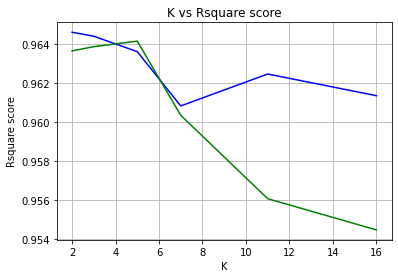

In [ ]:
plt.plot(K, rsqr_M, color ='blue')
plt.plot(K, rsqr_E, color ='green')
plt.rcParams["figure.figsize"] = (15,10)
plt.grid()
plt.title("K vs Rsquare score")
plt.xlabel("K")
plt.ylabel("Rsquare score")

## Q4. (b) 
#### Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

#### Ans. 
No, the R-squared scores changes with the value of K, Because on increasing the value of k results in increase of the no. of neighbours to be considered for prediction. For choosing the best K value, we need to plot a graph between k vs R2 score and choose the peak point also known as knee point or (elbow point).

## Q5. (a) 
#### Also, report the performance of scikit-learn’s kNN regression algorithm.

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
ypred = knn.predict(x_test) 
mse = mean_squared_error(y_test,ypred) 
mae = mean_absolute_error(y_test, ypred)
r2score = r2_score(y_test, ypred)

print("\nScikit learn model STATS")
print("--------------------------------------")
print()

print("\nMean Squared Error : ", end = "")
print(mse)
print("\nMean Absolute Error : ", end = "")
print(mae)
print("\nR2 score : ", end = "")
print(r2score)


Scikit learn model STATS
--------------------------------------


Mean Squared Error : 524155.8999443929

Mean Absolute Error : 182.76598702502318

R2 score : 0.9641010286010789


## Q5. (b)
Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]


In [ ]:
print("-> \t\t\t        MSE \t\t\t        MAE")
print("---------------------------------------------------------------------------")
print()
print("My Model" + " \t\t " + str(MSE_E) + " \t\t " + str(MAE_E))
print()
print("Scikit Learn" + " \t\t " + str(mse) + " \t\t " + str(mae))

-> 			        MSE 			        MAE
---------------------------------------------------------------------------

My Model 		 261839.20396663575 		 182.72048192771084

Scikit Learn 		 524155.8999443929 		 182.76598702502318


## Q6. 
#### From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?

Advantages:
1. No Training Period.
2. New data can be added anytime which will not impact the accuracy of the algorithm. 
3. It is very easy to implement.

Disadvantages:
1. It is a lazy learner and takes lot of time at the time of prediction.
2. Does not work well with large dataset.
3. Feature scaling is must to make correct predictions.




---




